In [1]:
import math
from skyfield.api import load
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.6f}'.format)

pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.max_colwidth', None)  # Display full content of each field

In [2]:
# Generate a test vector set using the known good Skyfield API
eph = load('de421.bsp')

# Define the time scale
ts = load.timescale()

# Define the solar system bodies with corresponding integer mappings
bodies = {
    'Sun': eph['sun'],
    'Mercury': eph['mercury'],
    'Venus': eph['venus'],
    'Mars': eph['mars'],
    'Jupiter': eph['JUPITER BARYCENTER'],
    'Saturn': eph['SATURN BARYCENTER'],
    'Uranus': eph['URANUS BARYCENTER'],
    'Neptune': eph['NEPTUNE BARYCENTER'],
    'Pluto': eph['PLUTO BARYCENTER']
}

# Test the code above
body_mapping = {
    'Mercury': 0,
    'Venus': 1,
    'Sun': 2,
    'Mars': 3,
    'Jupiter': 4,
    'Saturn': 5,
    'Uranus': 6,
    'Neptune': 7,
    'Pluto': 8
}


# Function to get RA, Dec, and distance
def get_ra_dec(body, time):
    astrometric = eph['earth'].at(time).observe(body).apparent()
    ra, dec, distance = astrometric.radec()
    return ra, dec, distance

# Generate 1500 evenly spaced times over the year 2023-2025
times = ts.utc(2023, 1, 1) + np.linspace(0, 365*3, 1500)

# Create a DataFrame to store results
results = []

# Get RA, Dec, and distance for each body at each time
for time in times:
    for name, body in bodies.items():
        ra, dec, distance = get_ra_dec(body, time)
        results.append({
            'date': time.utc_iso(),
            'julianDate': time.tt,
            'body': name,
            'body_int': body_mapping.get(name, -1),  # Get integer mapping, default to -1 if not found
            'ra': ra._degrees,
            'dec': dec.degrees,
            'distance': distance.au
        })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

In [3]:
RADS = math.radians(1)  # Conversion factor from degrees to radians
DEGS = math.degrees(1)  # Conversion factor from radians to degrees

def mod2pi(angle):
    """Normalize angle to range [0, 2π]."""
    return angle % (2 * math.pi)

def mean_elements(p, i, d):
    """
    Calculate the mean orbital elements for a given planet at a given date.
    
    Parameters:
    - p: dictionary to store the orbital elements
    - i: index representing the planet (0 = Mercury, 1 = Venus, ..., 8 = Pluto)
    - d: days since J2000.0
    
    Updates the dictionary `p` with the orbital elements:
    - a: semi-major axis
    - e: eccentricity
    - i: inclination
    - O: longitude of ascending node
    - w: argument of perihelion
    - L: mean longitude
    """
    cy = d / 36525  # Centuries since J2000.0

    if i == 0:  # Mercury
        p['a'] = 0.38709893 + 0.00000066 * cy
        p['e'] = 0.20563069 + 0.00002527 * cy
        p['i'] = (7.00487 - 23.51 * cy / 3600) * RADS
        p['O'] = (48.33167 - 446.30 * cy / 3600) * RADS
        p['w'] = (77.45645 + 573.57 * cy / 3600) * RADS
        p['L'] = mod2pi((252.25084 + 538101628.29 * cy / 3600) * RADS)
    elif i == 1:  # Venus
        p['a'] = 0.72333199 + 0.00000092 * cy
        p['e'] = 0.00677323 - 0.00004938 * cy
        p['i'] = (3.39471 - 2.86 * cy / 3600) * RADS
        p['O'] = (76.68069 - 996.89 * cy / 3600) * RADS
        p['w'] = (131.53298 - 108.80 * cy / 3600) * RADS
        p['L'] = mod2pi((181.97973 + 210664136.06 * cy / 3600) * RADS)
    elif i == 2:  # Earth/Sun
        p['a'] = 1.00000011 - 0.00000005 * cy
        p['e'] = 0.01671022 - 0.00003804 * cy
        p['i'] = (0.00005 - 46.94 * cy / 3600) * RADS
        p['O'] = (-11.26064 - 18228.25 * cy / 3600) * RADS
        p['w'] = (102.94719 + 1198.28 * cy / 3600) * RADS
        p['L'] = mod2pi((100.46435 + 129597740.63 * cy / 3600) * RADS)
    elif i == 3:  # Mars
        p['a'] = 1.52366231 - 0.00007221 * cy
        p['e'] = 0.09341233 + 0.00011902 * cy
        p['i'] = (1.85061 - 25.47 * cy / 3600) * RADS
        p['O'] = (49.57854 - 1020.19 * cy / 3600) * RADS
        p['w'] = (336.04084 + 1560.78 * cy / 3600) * RADS
        p['L'] = mod2pi((355.45332 + 68905103.78 * cy / 3600) * RADS)
    elif i == 4:  # Jupiter
        p['a'] = 5.20336301 + 0.00060737 * cy
        p['e'] = 0.04839266 - 0.00012880 * cy
        p['i'] = (1.30530 - 4.15 * cy / 3600) * RADS
        p['O'] = (100.55615 + 1217.17 * cy / 3600) * RADS
        p['w'] = (14.75385 + 839.93 * cy / 3600) * RADS
        p['L'] = mod2pi((34.40438 + 10925078.35 * cy / 3600) * RADS)
    elif i == 5:  # Saturn
        p['a'] = 9.53707032 - 0.00301530 * cy
        p['e'] = 0.05415060 - 0.00036762 * cy
        p['i'] = (2.48446 + 6.11 * cy / 3600) * RADS
        p['O'] = (113.71504 - 1591.05 * cy / 3600) * RADS
        p['w'] = (92.43194 - 1948.89 * cy / 3600) * RADS
        p['L'] = mod2pi((49.94432 + 4401052.95 * cy / 3600) * RADS)
    elif i == 6:  # Uranus
        p['a'] = 19.19126393 + 0.00152025 * cy
        p['e'] = 0.04716771 - 0.00019150 * cy
        p['i'] = (0.76986 - 2.09 * cy / 3600) * RADS
        p['O'] = (74.22988 - 1681.40 * cy / 3600) * RADS
        p['w'] = (170.96424 + 1312.56 * cy / 3600) * RADS
        p['L'] = mod2pi((313.23218 + 1542547.79 * cy / 3600) * RADS)
    elif i == 7:  # Neptune
        p['a'] = 30.06896348 - 0.00125196 * cy
        p['e'] = 0.00858587 + 0.00002510 * cy
        p['i'] = (1.76917 - 3.64 * cy / 3600) * RADS
        p['O'] = (131.72169 - 151.25 * cy / 3600) * RADS
        p['w'] = (44.97135 - 844.43 * cy / 3600) * RADS
        p['L'] = mod2pi((304.88003 + 786449.21 * cy / 3600) * RADS)
    elif i == 8:  # Pluto
        p['a'] = 39.48168677 - 0.00076912 * cy
        p['e'] = 0.24880766 + 0.00006465 * cy
        p['i'] = (17.14175 + 11.07 * cy / 3600) * RADS
        p['O'] = (110.30347 - 37.33 * cy / 3600) * RADS
        p['w'] = (224.06676 - 132.25 * cy / 3600) * RADS
        p['L'] = mod2pi((238.92881 + 522747.90 * cy / 3600) * RADS)
    else:
        raise ValueError("Invalid planet index")

def mean_anomaly(p):
    return mod2pi(p['L'] - p['w'])

EPS = 1e-6  # Tolerance for convergence

def true_anomaly(M, e):
    """
    Calculate the true anomaly from the mean anomaly and eccentricity.

    Parameters:
    - M: mean anomaly in radians
    - e: eccentricity

    Returns:
    - V: true anomaly in radians
    """
    # Initial approximation of eccentric anomaly
    E = M + e * math.sin(M) * (1.0 + e * math.cos(M))

    # Iterate to improve accuracy
    while True:
        E1 = E
        E = E1 - (E1 - e * math.sin(E1) - M) / (1 - e * math.cos(E1))
        if abs(E - E1) <= EPS:
            break

    # Convert eccentric anomaly to true anomaly
    V = 2 * math.atan(math.sqrt((1 + e) / (1 - e)) * math.tan(0.5 * E))

    if V < 0:
        V += 2 * math.pi  # Modulo 2pi

    return V

def heliocentric_radius(a, e, v):
    """
    Calculate the heliocentric radius.

    Parameters:
    - a: semi-major axis
    - e: eccentricity
    - v: true anomaly in radians

    Returns:
    - r: heliocentric radius
    """
    r = (a * (1 - e**2)) / (1 + e * math.cos(v))
    return r

def helocentric_coordinates(r, o, v, w, i):
    """
    Calculate the heliocentric coordinates.

    Parameters:
    - r: heliocentric radius
    - O: longitude of ascending node
    - v: true anomaly in radians
    - w: argument of perihelion
    - i: inclination

    Returns:
    - x, y, z - coordinates
    """
    x = r * (math.cos(o) * math.cos(v + w - o) - math.sin(o) * math.sin(v + w - o) * math.cos(i))
    y = r * (math.sin(o) * math.cos(v + w - o) + math.cos(o) * math.sin(v + w - o) * math.cos(i))
    z = r * (math.sin(v + w - o) * math.sin(i))
    
    return (x, y, z)

def helocentric_coordinates_earth(r, v, w):
    """
    Calculate the heliocentric coordinates.

    Parameters:
    - r: heliocentric radius
    - v: true anomaly in radians
    - w: argument of perihelion

    Returns:
    - x, y, z - coordinates
    """    
    x = r * math.cos(v + w)
    y = r * math.sin(v + w)
    z = 0.0
    
    return (x, y, z)


def calculate_equation_of_time(date, earth):
    cy = date / 36525  # Centuries since J2000.0
    epsilon = 23.4392911 - 0.0130042 * cy  # Obliquity of the ecliptic
    epsilon = math.radians(epsilon)

    L0 = mod2pi((280.46646 + 36000.76983 * cy) * RADS)  # Mean longitude of the Sun
    M = mod2pi((357.52911 + 35999.05029 * cy) * RADS)  # Mean anomaly of the Sun
    e = 0.016708634 - 0.000042037 * cy  # Eccentricity of Earth's orbit

    y = math.tan(epsilon / 2) ** 2

    EoT = (y * math.sin(2 * L0) - 2 * e * math.sin(M) + 4 * e * y * math.sin(M) * math.cos(2 * L0) -
           0.5 * y ** 2 * math.sin(4 * L0) - 1.25 * e ** 2 * math.sin(2 * M)) * DEGS

    return 4 * EoT  # Convert to minutes

def calculate_planet_position(date, planetIx):
    date -= 2451545.0
    
    earth = {}
    planet = {}

    mean_elements(earth, 2, date)
    mean_elements(planet, planetIx, date) 

    # position of Earth in its orbit
    m_earth = mean_anomaly(earth)
    v_earth = true_anomaly(m_earth, earth['e'])
    r_earth = heliocentric_radius(earth['a'], earth['e'], v_earth)

    # heliocentric rectangular coordinates of Earth
    x_earth, y_earth, z_earth = helocentric_coordinates_earth(r_earth, v_earth, earth['w'])

    # position of planet in its orbit
    m_planet = mean_anomaly(planet)
    v_planet = true_anomaly(m_planet, planet['e'])
    r_planet = heliocentric_radius(planet['a'], planet['e'], v_planet)

    x_planet, y_planet, z_planet = helocentric_coordinates(r_planet, planet['O'], v_planet, planet['w'], planet['i'])

    if planetIx == 2:  # Sun
        x_planet = 0
        y_planet = 0
        z_planet = 0
    
    # convert to geocentric rectangular coordinates
    xg = x_planet - x_earth
    yg = y_planet - y_earth
    zg = z_planet - z_earth

    # rotate around x axis from ecliptic to equatorial coords
    ecl = 23.439281 * RADS  # Value for J2000.0 frame
    xeq = xg
    yeq = yg * math.cos(ecl) - zg * math.sin(ecl)
    zeq = yg * math.sin(ecl) + zg * math.cos(ecl)

    # find the RA and DEC from the rectangular equatorial coords
    ra = math.degrees(mod2pi(math.atan2(yeq, xeq))) 
    dec = math.degrees(math.atan(zeq / math.sqrt(xeq * xeq + yeq * yeq)))
    rvec = math.sqrt(xeq * xeq + yeq * yeq + zeq * zeq)
    
    # Calculate the equation of time
    eot = calculate_equation_of_time(date, earth)

    return ra, dec, rvec, eot

# Predefined angles for different solar events
SUNRISE_SUNSET_ANGLE = 0.833
CIVIL_TWILIGHT_ANGLE = 6
NAUTICAL_TWILIGHT_ANGLE = 12
ASTRONOMICAL_TWILIGHT_ANGLE = 18

def calculate_twilight_hour_angle(latitude, dec, angle=SUNRISE_SUNSET_ANGLE):
    latitude_rad = math.radians(latitude)
    dec_rad = math.radians(dec)
    angle_rad = math.radians(90+angle)

    # Calculate the hour angle argument
    HAarg = (math.cos(angle_rad) / (math.cos(latitude_rad) * math.cos(dec_rad)) - math.tan(latitude_rad) * math.tan(dec_rad))
    # Clamp HAarg to the range [-1, 1] to avoid domain errors in acos
    HAarg = max(min(HAarg, 1), -1)
    
    # Calculate the hour angle
    H = math.acos(HAarg)

    return H

RISE = 1
SET = -1

def is_number(input_val):
    try:
        float(input_val)
        return True
    except ValueError:
        return False

def calc_sunrise_riseset_utc(date, latitude, longitude, riseset):
    ra, dec, rvec, eot = calculate_planet_position(date, 2) # 2 is sun
    hour_angle = calculate_twilight_hour_angle(latitude, dec)
    hour_angle *= riseset
    delta = longitude + hour_angle*DEGS
    time_utc = 720 - (4.0 * delta) - eot  # in minutes
    return time_utc

def calc_sunrise_set(date, latitude, longitude, timezone, riseset):
    time_utc = calc_sunrise_riseset_utc(date, latitude, longitude, riseset)
    new_time_utc = calc_sunrise_riseset_utc(date + time_utc / 1440.0, latitude, longitude, riseset)
    
    time_local = new_time_utc + (timezone * 60.0)
    jday = date
    while time_local < 0.0 or time_local >= 1440.0:
        increment = 1 if time_local < 0 else -1
        time_local += increment * 1440.0
        jday -= increment
    return {"jday": jday, "timelocal": time_local}


In [4]:
def ra_to_hours_minutes(ra_degrees):
    total_hours = ra_degrees / 15.0
    hours = int(total_hours)
    minutes = (total_hours - hours) * 60
    return hours, minutes


def dec_to_degrees_minutes(dec_degrees):
    degrees = int(dec_degrees)
    minutes = abs((dec_degrees - degrees) * 60)
    return degrees, minutes

In [5]:
# Adjusted function to calculate the smallest angular difference
def angular_difference(ra1, ra2):
    diff = abs(ra1 - ra2) % 360
    return min(diff, 360 - diff)

# Function to call user's implementation and verify results
def verify_planet_position(date, body_int, expected_ra, expected_dec, expected_distance):
    # Call user's function (assuming it is already defined in the Jupyter Notebook)
    calculated_ra, calculated_dec, calculated_dist, _ = calculate_planet_position(date, body_int)
    
    # Calculate absolute differences
    delta_ra = angular_difference(calculated_ra, expected_ra)
    delta_dec = abs(calculated_dec - expected_dec)
    delta_distance = abs(calculated_dist - expected_distance)
    
    return delta_ra, delta_dec, delta_distance

# Iterate over the DataFrame and verify each entry
verification_results = []
for index, row in df_results.iterrows():
    delta_ra, delta_dec, delta_distance = verify_planet_position(row['julianDate'], row['body_int'], row['ra'], row['dec'], row['distance'])
    verification_results.append({
        'date': row['date'],
        'body': row['body'],
        'delta_ra': delta_ra,
        'delta_dec': delta_dec,
        'delta_distance': delta_distance
    })

# Convert the verification results into a DataFrame
df_verification = pd.DataFrame(verification_results)

# Define thresholds for verification
ra_threshold = 0.01  # in hours
dec_threshold = 0.1  # in degrees
distance_threshold = 0.01  # in AU

# Add columns to indicate if the values are within the threshold
df_verification['ra_match'] = df_verification['delta_ra'] < ra_threshold
df_verification['dec_match'] = df_verification['delta_dec'] < dec_threshold
df_verification['distance_match'] = df_verification['delta_distance'] < distance_threshold


In [6]:
# Calculate the maximum, mean, and median for delta_ra, delta_dec, and delta_distance
max_delta_ra = df_verification['delta_ra'].max()
mean_delta_ra = df_verification['delta_ra'].mean()
median_delta_ra = df_verification['delta_ra'].median()

max_delta_dec = df_verification['delta_dec'].max()
mean_delta_dec = df_verification['delta_dec'].mean()
median_delta_dec = df_verification['delta_dec'].median()

max_delta_distance = df_verification['delta_distance'].max()
mean_delta_distance = df_verification['delta_distance'].mean()
median_delta_distance = df_verification['delta_distance'].median()

# Display the results
print(f"RA: Max Delta: {max_delta_ra} degrees")
print(f"Dec: Max Delta: {max_delta_dec} degrees")
print(f"Distance: Max Delta: {max_delta_distance} AU")


RA: Max Delta: 0.07545677921177685 degrees
Dec: Max Delta: 0.029258731248640757 degrees
Distance: Max Delta: 0.012866045167715612 AU


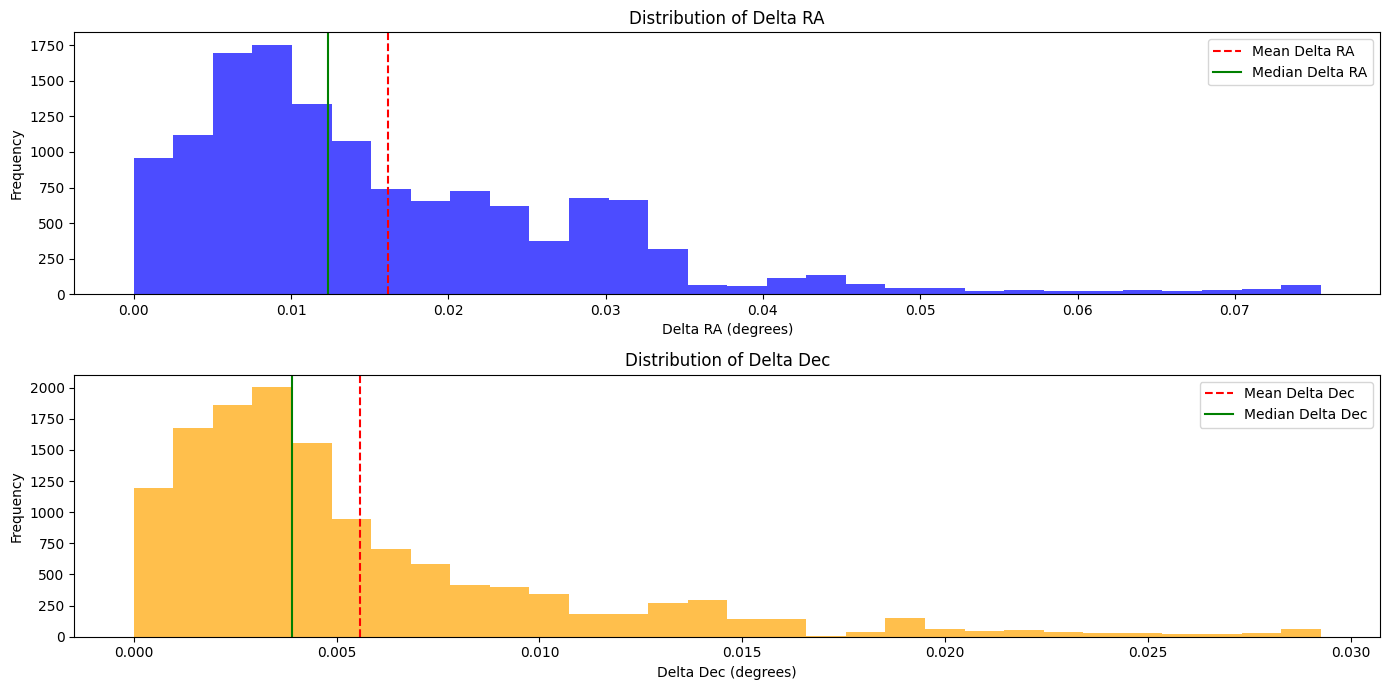

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of delta RA and delta Dec across all entries
plt.figure(figsize=(14, 7))

# Histogram for delta RA
plt.subplot(2, 1, 1)
plt.hist(df_verification['delta_ra'], bins=30, color='blue', alpha=0.7)
plt.axvline(df_verification['delta_ra'].mean(), color='r', linestyle='--', label='Mean Delta RA')
plt.axvline(df_verification['delta_ra'].median(), color='g', linestyle='-', label='Median Delta RA')
plt.xlabel('Delta RA (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Delta RA')
plt.legend()

# Histogram for delta Dec
plt.subplot(2, 1, 2)
plt.hist(df_verification['delta_dec'], bins=30, color='orange', alpha=0.7)
plt.axvline(df_verification['delta_dec'].mean(), color='r', linestyle='--', label='Mean Delta Dec')
plt.axvline(df_verification['delta_dec'].median(), color='g', linestyle='-', label='Median Delta Dec')
plt.xlabel('Delta Dec (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Delta Dec')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Select only the required columns
df_filtered = df_results[['julianDate', 'body', 'ra', 'dec', 'distance']]

# Output the DataFrame to a JSON file
df_filtered.to_json('ephemeris_test.json', orient='records')

In [9]:
from datetime import datetime, timedelta

year = 2024
month = 8
day = 4

date = 2460526.5
latitude = 19.639994  # Latitude for Kona, Hawaii
longitude = -155.996926  # Longitude for Kona, Hawaii
timezone = -10  # Hawaii-Aleutian Standard Time

sunrise = calc_sunrise_set(date, latitude, longitude, timezone, RISE)
sunset = calc_sunrise_set(date, latitude, longitude, timezone, SET)

# Convert minutes since midnight to datetime
def convert_to_datetime(minutes, year, month, day):
    hours, minutes = divmod(minutes, 60)
    return datetime(year, month, day, int(hours), int(minutes))

sunrise_time = convert_to_datetime(sunrise['timelocal'], year, month, day)
sunset_time = convert_to_datetime(sunset['timelocal'], year, month, day)

print(f"Sunrise: {sunrise_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Sunset: {sunset_time.strftime('%Y-%m-%d %H:%M:%S')}")

Sunrise: 2024-08-04 06:01:00
Sunset: 2024-08-04 18:58:00


In [10]:
ra, dec, rvec, eot = calculate_planet_position (date, 2)
ha = calculate_twilight_hour_angle(dec, latitude, ASTRONOMICAL_TWILIGHT_ANGLE)
ha

2.0425055334420623